This notebook gives a flavour of the sort of analysis that can be performed using the polling client.

In [1]:
# Load up the client and basic tools.

%matplotlib inline 
import pandas as pd
import datetime
from pollingclient.client import PollingClient
pc = PollingClient()


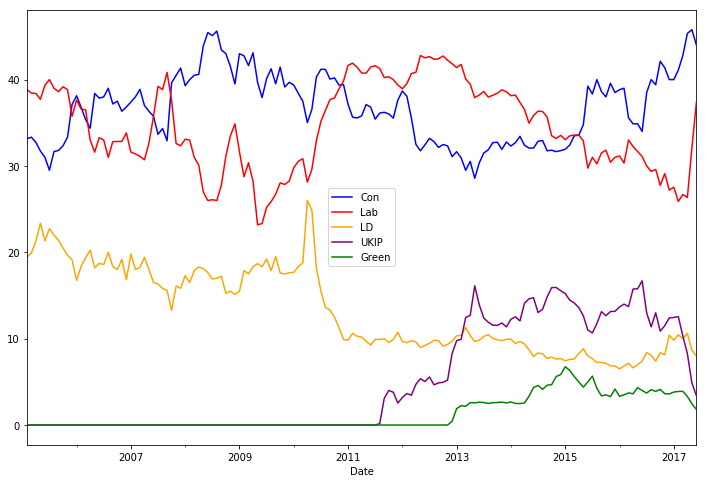

In [11]:
# A simple plot of the month average polls for the parties.

color_map = {'Con': 'blue', 'Lab': 'red', 'LD': 'orange', 'Green': 'green', 'UKIP': 'purple'}
colors = [color_map[x] for x in dfm.columns]
dfm[dfm.index>datetime.datetime(2005,1,1)].plot(color=colors, figsize=(12, 8));


In [2]:
# Find the lowest average polling months for Labour when in opposition.
dfm = pc.monthly_average()
l_in = dfm[list(dfm.index.map(lambda x: not pc.party_in_power('Lab', x)))]
l_in.sort_values("Lab").round(1).head(5)

,Con,Lab,LD,UKIP,Green
Date,,,,,
2017-02-01,41.1,25.9,10.4,12.6,3.9
1981-12-01,25.0,26.2,46.8,0.0,0.0
1982-06-01,48.3,26.3,24.0,0.0,0.0
2017-04-01,45.3,26.3,10.6,8.3,3.3
1983-09-01,45.5,26.7,26.3,0.0,0.0


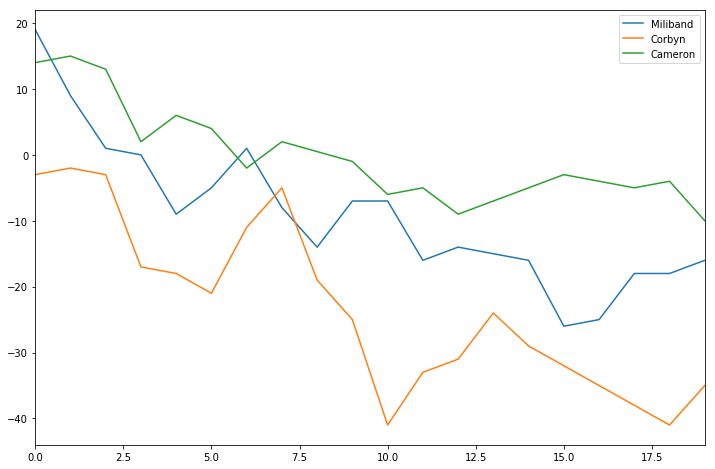

In [7]:
# Compare net approval rating progress of recent opposition leaders.
df = pc.compare_ratings(["Miliband", "Corbyn", "Cameron"], "Net", True).interpolate()
df.plot(figsize=(12,8));


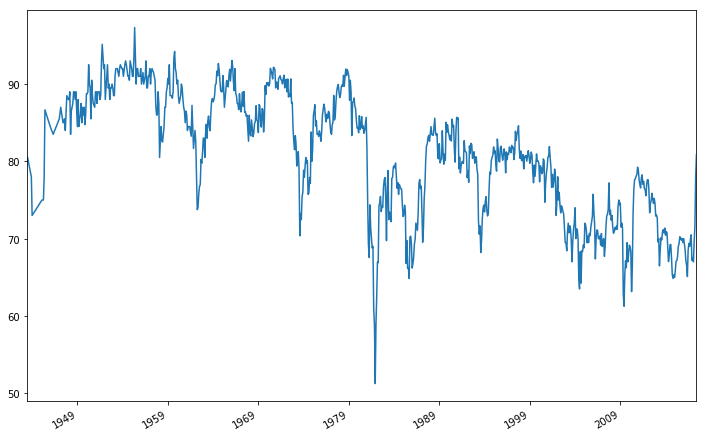

In [5]:
# The combined share of the Labour and Conservatives over time.
s = pd.Series(list(dfm.Con + dfm.Lab), list(dfm.index))
s.plot(figsize=(12, 8));

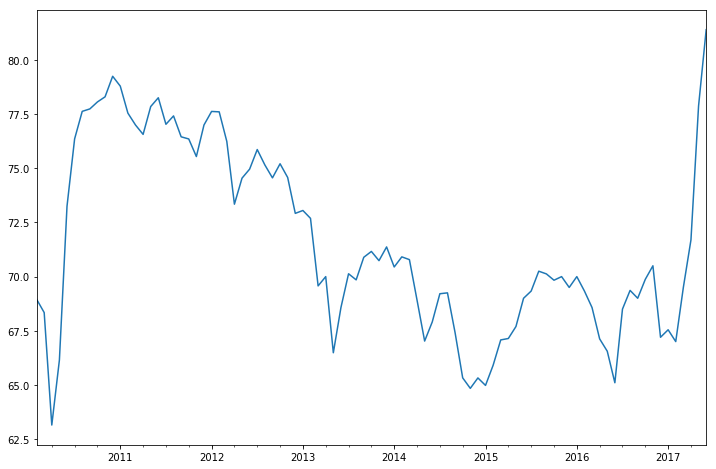

In [34]:
# The same as above, but concentrating on the last few years
# Ths captures the collapse of the Lib Dem vote in 2010 and the UKIP vote in 2017.
s = pd.Series(list(dfm.Con + dfm.Lab), list(dfm.index))
s[s.index>datetime.datetime(2010,1,1)].plot(figsize=(12, 8));

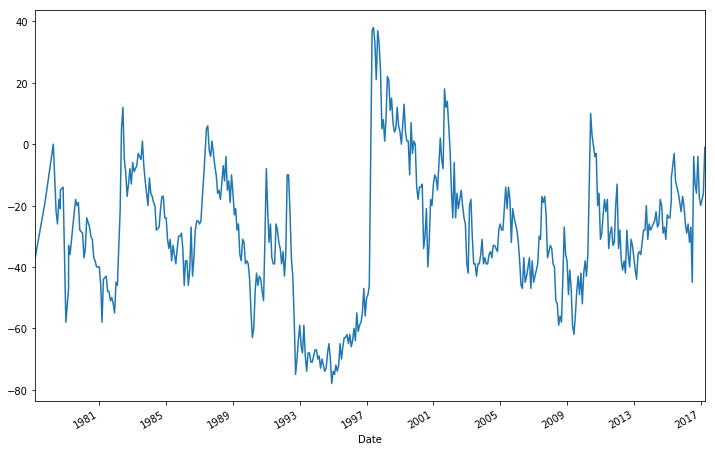

In [26]:
# Net government approval rating.  It's very rarely positive.
pc.get_leader_ratings("Gov't").Net.plot(figsize=(12,8));

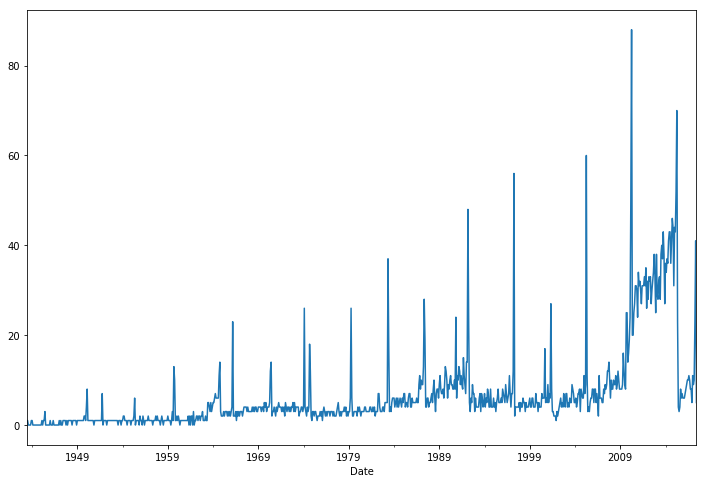

In [13]:
# Frequency of polling.  The spikes are obviously general elections.  
df1 = pc.parties
df1.index = pd.to_datetime(df1.index)
x = df1.resample('M').count()['Con']
x.plot(figsize=(12, 8));

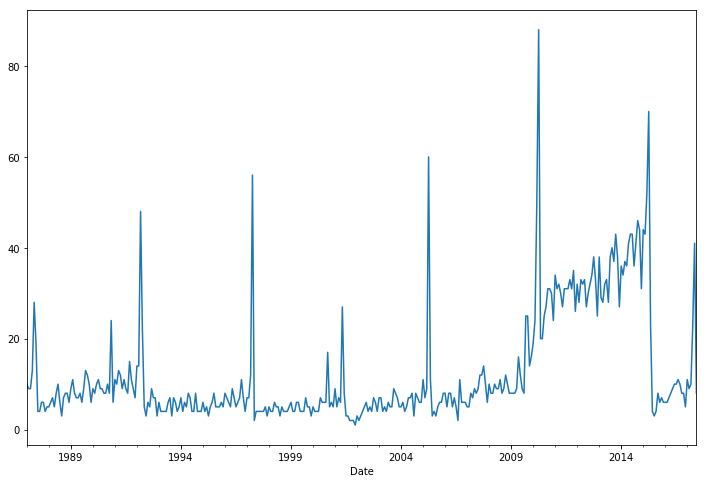

In [9]:
# Same as above showing just more recent data.
# Note the relative decreases in frequency after the polling misses of 1992 and 2015.
df1 = pc.parties
df1.index = pd.to_datetime(df1.index)
x = df1.resample('M').count()['Con']
x[x.index>datetime.datetime(1987,1,1)].plot(figsize=(12, 8));